In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def z_score(sample_mean, sample_size, pop_mean, pop_std):
    nume = sample_mean- pop_mean
    deno = pop_std/np.sqrt(n)
    z = nume/ deno
    return z

$$ Q-2 $$

$
Step\ 1:\\
Null\ Hypothesis(Status\ Quo):H_o\ \leq\ 4\\
Alternate\ Hypothesis(Bold\ claim):H_1\ >\ 4\\
$

$
Step\ 2:\\
Collect\ a\ Sample\ of\ size\ n\ =\ 10\\
$
$$
Sample = [4,\ 3,\ 5,\ 4,\ 5,\ 3,\ 5,\ 5,\ 4,\ 2,\ 4,\ 5,\ 5,\ 4,\ 4,\ 5,\ 4,\ 5,\ 4,\ 5]
$$
$
Calculate\ the\ mean(\overline{X})\ of\ the\ sample.\
$


In [57]:
 
Sample = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
n = 20
mean = sum(Sample)/ n
print("Mean:", mean)


Mean: 4.25


$
Step\ 3:\
Compute\ Test\ Statistics.\\
Use\ "z-score"\ if\ Standard\ Deviation(\sigma)\ is\ given\\
$
$$
z-score\ =\  \frac{\overline{X}-\mu_{\overline{X}}}{\frac{\sigma}{\sqrt{n}}} \\
$$
$
Else\ use\ "t-score"\ if\ Standard\ Deviation(\sigma)\ is\ not\ given\:\
$
$$
t-score\ =\ \frac{\overline{X}-\mu_{\overline{X}}}{\frac{S}{\sqrt{n}}}\\
$$
$$
where, S\ =\ Sample\ Standard\ Deviation\\
S = \sqrt{\frac{\sum_{i=0}^{n}(Obs-\overline{X})^2}{n-1}}\\
\mu_{\overline{X}}\ =\ 5\ =\ Population\ mean\\
$$

In [58]:
SD = np.sqrt(sum((x-mean)**2 for x in Sample)/ (n-1))
print("SD:", SD)
SE = SD / np.sqrt(n-1)
pop_mean = 5
print("pop_mean:", pop_mean)
print("SE:", SE)

SD: 0.8506963092234007
pop_mean: 5
SE: 0.19516311808146478


$Since\ we\ don't\ have\ \sigma\ given\ we\ will\ go\ for\ t-score\$

In [59]:
t_score = z_score(mean, n, pop_mean, SD)
print("t_score:", t_score)

t_score: -3.942772444036626


$
Step\ 4:\\ 
Decide\ the\ value\ of\ significance\ level(\alpha)\\
If\ confidence\ level\ is\ taken\ as\ 95\%\ =\ 0.95 \\
then, \\
$
$$
1\ -\ \alpha\ =\ 0.95\\
\alpha\ =\ 0.05\\
$$

In [60]:
from scipy.stats import t
confidence_level = 0.95
alpha = 0.05

In [61]:
t_critical = t.ppf((1.0 - alpha), df= 19)
print(t_critical)

1.729132811521367


$
Step\ 5.1:\
    Apply\ decision\ rule\\
    For\ Bold\ Claim\ H_o\ >\ 4\ we\ consider\ right\ tailed\ t-test.\\
$    

Text(4.25, 0.1, 'x_bar')

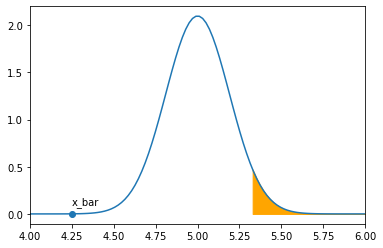

In [62]:
mn = 4
mx = 6

Mean = pop_mean
std = SD/ n**0.5

x = np.linspace(mn, mx, 100)
y = norm.pdf(x, Mean, std)
plt.xlim(mn, mx)
plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x2 = np.linspace(t_critical_right, mx, 100)
y2 = norm.pdf(x2, Mean, std)
plt.fill_between(x2, y2, color = "orange")

plt.scatter(mean, 0)
plt.annotate("x_bar", (mean, 0.1))

$
Step\ 5.2:\ Calculate\ p-value\ and\ get\ the\ conclusion\\ 
$

$Conclusion\ using\ t-test\$

In [63]:
if (t_score > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


$Conclusion\ using\ p-value\$

In [66]:
p_value = 1.0 - norm.cdf((t_score))
print("p-value:", p_value)
if (p_value < alpha):
    print("Reject Null Hypothesis")
else: 
    print("Fail to reject Null Hypothesis")

p-value: 0.9999597274646016
Fail to reject Null Hypothesis
